In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d sarath02003/celebrity-cropped-face

Dataset URL: https://www.kaggle.com/datasets/sarath02003/celebrity-cropped-face
License(s): Apache 2.0
 65% 13.0M/20.0M [00:00<00:00, 53.0MB/s]
100% 20.0M/20.0M [00:00<00:00, 63.9MB/s]


In [3]:
#unzip
import zipfile
zip_ref = zipfile.ZipFile('/content/celebrity-cropped-face.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
#import dependencies
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [5]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [6]:
# create a model object
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(31,activation='sigmoid'))

In [7]:
conv_base.trainable = False

In [8]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [9]:
#Data Augmentation
batch_size = 32

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/content/CroppedImages/train',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/CroppedImages/test',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 2308 images belonging to 31 classes.
Found 218 images belonging to 31 classes.


In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit_generator(
        train_generator,
        epochs=15,
        validation_data=validation_generator)

<ipython-input-11-f568010376c1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
73/73 [==============================] - 25s 250ms/step - loss: 2.9387 - accuracy: 0.2054 - val_loss: 2.1602 - val_accuracy: 0.3624
Epoch 2/15
73/73 [==============================] - 15s 200ms/step - loss: 1.9153 - accuracy: 0.4610 - val_loss: 1.5998 - val_accuracy: 0.5963
Epoch 3/15
73/73 [==============================] - 15s 199ms/step - loss: 1.4597 - accuracy: 0.5979 - val_loss: 1.2760 - val_accuracy: 0.6193
Epoch 4/15
73/73 [==============================] - 16s 225ms/step - loss: 1.1911 - accuracy: 0.6720 - val_loss: 1.0843 - val_accuracy: 0.7156
Epoch 5/15
73/73 [==============================] - 14s 198ms/step - loss: 0.9660 - accuracy: 0.7361 - val_loss: 1.0790 - val_accuracy: 0.6881
Epoch 6/15
73/73 [==============================] - 15s 200ms/step - loss: 0.8382 - accuracy: 0.7717 - val_loss: 0.9987 - val_accuracy: 0.7202
Epoch 7/15
73/73 [==============================] - 15s 200ms/step - loss: 0.7228 - accuracy: 0.8107 - val_loss: 0.9792 - val_accuracy: 0.7431

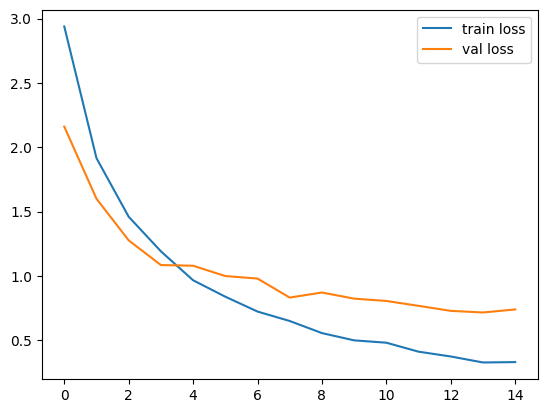

In [18]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

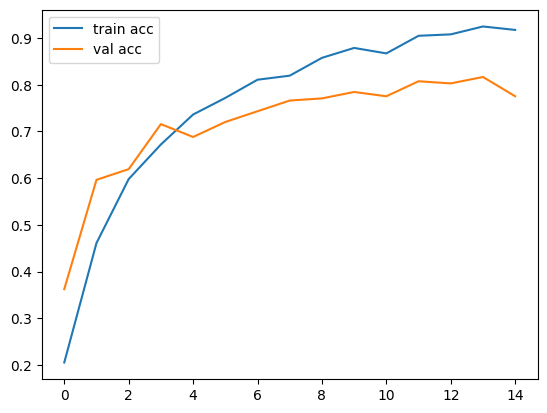

In [19]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [20]:
model.save('FR.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
from keras.models import load_model
from keras.preprocessing.image import load_img,img_to_array

model1 = load_model('./FR.h5',compile=False)

In [24]:
lab = train_generator.class_indices
lab={k:v for v,k in lab.items()}

In [25]:
def output(location):
    img=load_img(location,target_size=(150,150,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model1.predict(img)
    y_class = answer.argmax(axis=-1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = lab[y]
    return res

1/1 [==============================] - 1s 1s/step


'Akshay Kumar'

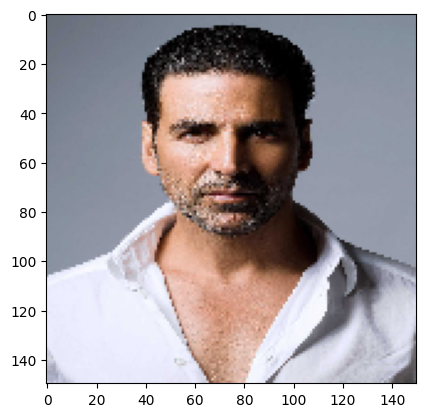

In [26]:
img='/content/akshay kumar image.jpg'
pic=load_img('/content/akshay kumar image.jpg',target_size=(150,150,3))
plt.imshow(pic)
output(img)